In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
df=pd.read_csv("/content/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#number of row ad column 
df.shape

(1338, 8)

In [5]:
#getting some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
#as we can see that we dont have any null value in our data


In [7]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [8]:
#how many female and male
df["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [9]:
#lets check  stats score
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


# EDA

In [10]:
#checking numbers of unique rows i each features
df.nunique().sort_values()

sex                  2
smoker               2
insuranceclaim       2
region               4
children             6
age                 47
bmi                548
charges           1337
dtype: int64

<ipython-input-11-2ff479f4b32d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


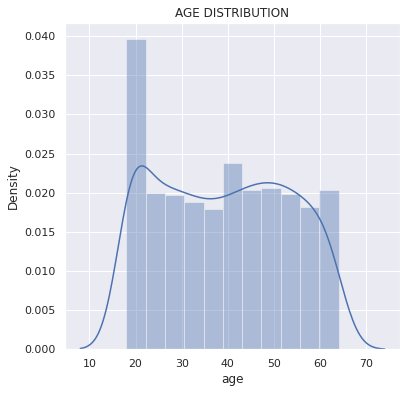

In [11]:
#distiribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("AGE DISTRIBUTION")
plt.show()

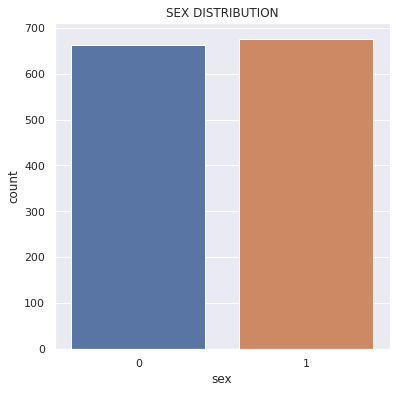

In [12]:
#visualise sex ratio

plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("SEX DISTRIBUTION")
plt.show()

In [13]:
df["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

<ipython-input-14-d1d452f98eb9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


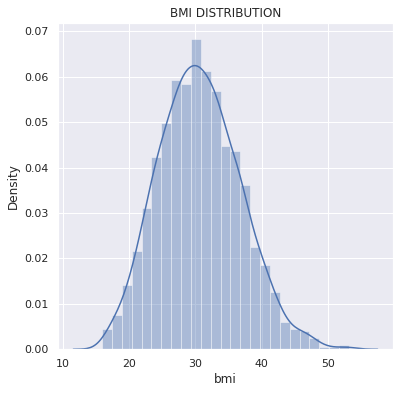

In [14]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("BMI DISTRIBUTION")
plt.show()

In [15]:
#normal bmi range--> 18.5 to 24.9

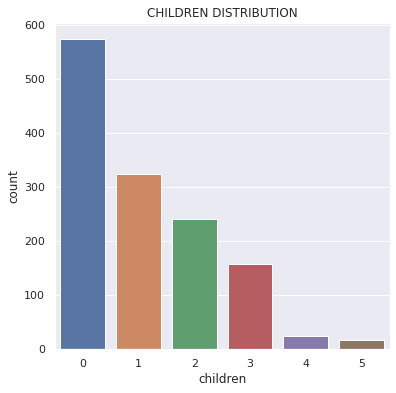

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=df)
plt.title("CHILDREN DISTRIBUTION")
plt.show()

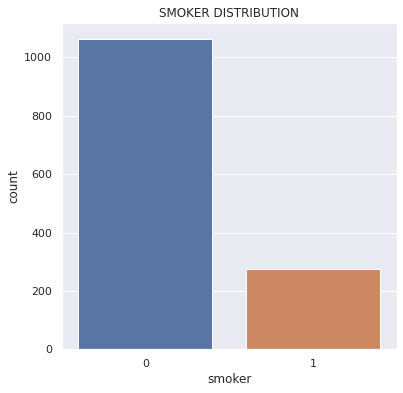

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=df)
plt.title("SMOKER DISTRIBUTION")
plt.show()

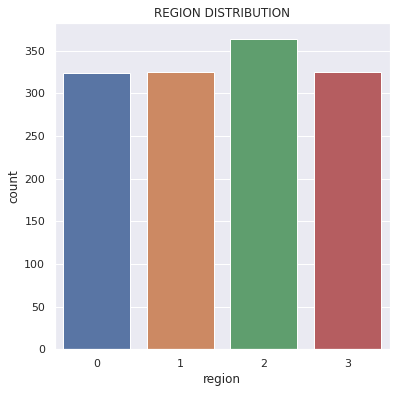

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=df)
plt.title("REGION DISTRIBUTION")
plt.show()

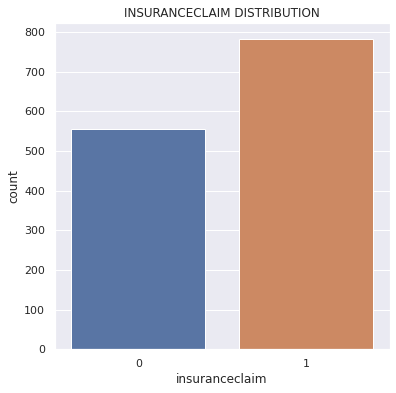

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x="insuranceclaim",data=df)
plt.title("INSURANCECLAIM DISTRIBUTION")
plt.show()

<ipython-input-20-2e2e0d09d3c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"])


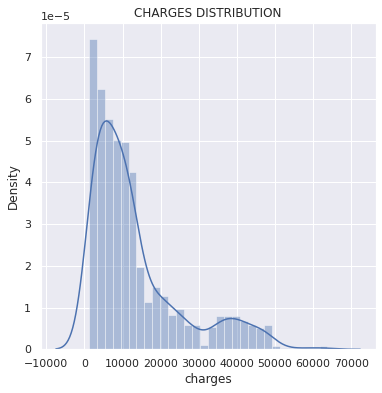

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(df["charges"])
plt.title("CHARGES DISTRIBUTION")
plt.show()

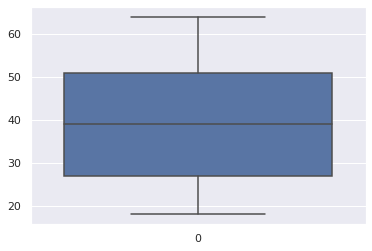

In [21]:
#check outlier in age
sns.boxplot(df["age"])
plt.show()

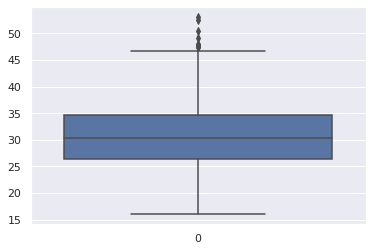

In [22]:
#check outlier in bmi
sns.boxplot(df["bmi"])
plt.show()

In [23]:
#position of outlier
print(np.where(df["bmi"]>46.5))

(array([ 116,  286,  401,  438,  454,  543,  547,  660,  847,  860,  930,
       1047, 1088, 1317]),)


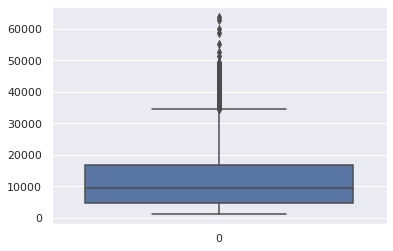

In [24]:
#check outlier in charges
sns.boxplot(df["charges"])
plt.show()

In [25]:
#position of outlier
outlier=(np.where(df["charges"]>35000))

In [26]:
#Removal of outlier:

df1 = df.copy()

for i in [i for i in df1.columns]:
    if df1[i].nunique()>=12:
        Q1 = df1[i].quantile(0.25)
        Q3 = df1[i].quantile(0.75)
        IQR = Q3 - Q1
        df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
        df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1



Inference: Before removal of outliers, The dataset had 1338 samples.
Inference: After removal of outliers, The dataset now has 1191 samples.


In [27]:
#remove duplicte row (if any)
r,c=df1.shape
df2=df1.copy()
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True,inplace=True)

if df2.shape==(r,c):
  print("dataset doesnot have any duplicate value")
else:
  print("numbers of duplicate drop---",{r-df2.shape[0]})

numbers of duplicate drop--- {1}


In [28]:
df2.shape

(1190, 8)

In [29]:

df3=pd.get_dummies(df2,columns=["children","region"])

In [30]:
df=df3
df.shape

(1190, 16)

# Feature selection

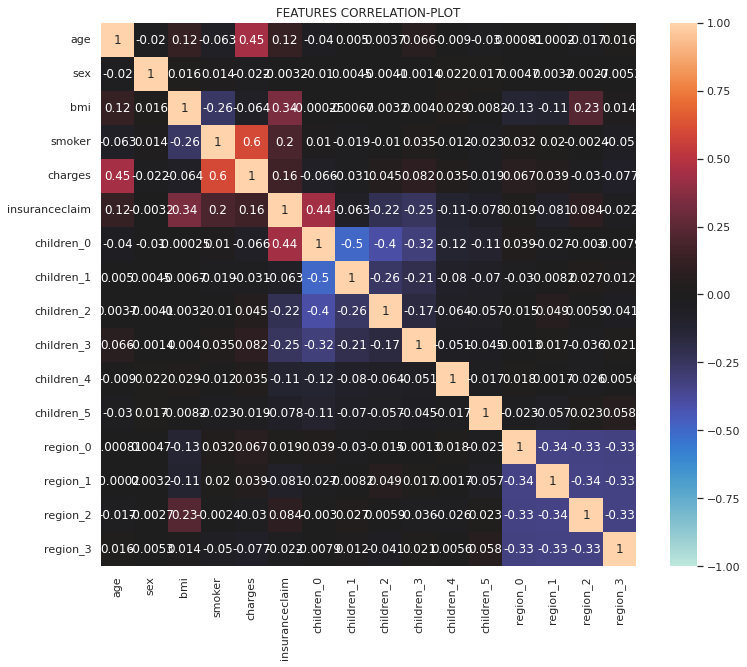

In [31]:
#checking the correlation
features=df.columns
plt.figure(figsize=[12,10])
plt.title("FEATURES CORRELATION-PLOT")
sns.heatmap(df[features].corr(),vmin=-1,vmax=1,center=0,annot=True)
plt.show()

In [32]:


df.drop(["children_0","region_0"],axis=1,inplace=True)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("insuranceclaim",axis=1),df["insuranceclaim"],test_size=0.2,random_state=12)

In [34]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (952, 13)
X_test :  (238, 13)
y_train :  (952,)
y_test :  (238,)


In [35]:
from sklearn.preprocessing import StandardScaler
# initialize scaler
normalizer = StandardScaler()
#fit on data
normalizer.fit(X_train)
#transform
X_train_scaled = normalizer.transform(X_train)
X_test_scaled = normalizer.transform(X_test)
# save into diff data
X_train_scaled= pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [36]:
#after scaling 
print("X_train : ",X_train_scaled.shape)
print("X_test : ",X_test_scaled.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (952, 13)
X_test :  (238, 13)
y_train :  (952,)
y_test :  (238,)


In [57]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [59]:
# model

clf = SVC(kernel = 'rbf',random_state = 0)
clf.fit(X_train_scaled,y_train)

SVC(random_state=0)

In [60]:
# prediction

y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [61]:
# accuracy

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.865546218487395
